# s06: Dimensionality Reduction

Datasets are sometimes very large, containing potentially millions of data points across a large numbers of features. 

Each feature can also be thought of as a 'dimension'. In some cases, for high-dimensional data, we may want or need to try to reduce the number of dimensions. Reducing the number of dimensions (or reducing the number of features in a dataset) is called 'dimensionality reduction'. 

The simplest way to do so could simply be to drop some dimensions, and we could even choose to drop the dimensions that seem likely to be the least useful. This would be a simple method of dimensionality reduction. However, this approach is likely to throw away a lot of information, and we wouldn't necessarily know which features to keep. Typically we want to try to reduce the number of dimensions while still preserving the most information we can from the dataset. 

As we saw before, one way we could try and do something like this is by doing clustering. When we run a clustering analysis on high dimensional data, we can try and re-code data to store each point by it's cluster label, potentially maintaining more information in a smaller number of dimensions.

Here we will introduce and explore a different approach to dimensionality reduction. Instead of dropping or clustering our features, we are going to try and learn a new representation of our data, choosing a set of feature dimensions that capture the most variance of our data. This allows us to drop low information dimensions, meaning we can reduce the dimensionality of our data, while preserving the most information. 

<div class="alert alert-success">
Dimensionality reduction is the process of transforming a dataset to a lower dimensional space. 
</div>

<div class="alert alert-info">
For more information on dimensionality reduction, see the scikit-learn 
<a href=https://scikit-learn.org/stable/modules/unsupervised_reduction.html class="alert-link">user manual</a>,
and / or 
<a href=http://colah.github.io/posts/2014-10-Visualizing-MNIST/ class="alert-link">blog post</a>
with an explainer and examples in real data.
</div>

## Principal Component Analysis

The method we will for dimensionality reduction is Principal Component Analysis (PCA).

PCA can be used to learn a new representation of the data, 're-organizing' our features into a set of new dimensions that are ranked by the variance of the dataset that they account for. With this, we can do dimensionality reduction by dropping dimensions with a small amount of explained variance. 

<div class="alert alert-success">
Principal Component Analysis (PCA) is procedure to transform a dataset into principle components, ordered by how much variance they capture.
</div>

<div class="alert alert-info">
For a paper that covers a full tutorial of PCA, go 
<a href="https://arxiv.org/pdf/1404.1100.pdf" class="alert-link">here</a>.
For a more technical overview and explainer, check out this 
<a href="http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/" class="alert-link">post</a>.
</div>

### PCA Overview

To use PCA for Dimensionality Reduction, we can apply PCA to a dataset, learning our new components that represent the data. From this, we can choose to preserve _n_ components, where _n_ is a number lower than the original dimensionality of our data set. By transforming our data with PCA, and choosing the keep the top _n_ components, we are able to keep the most variance of the original data in our lower dimensional space.

Broadly, PCA seeks to take advantage of the correlational structure of the variables, and uses this structure to re-encode the data. For example, if feature $x_1$ and $x_2$ of our data are correlated, PCA looks for how it could re-organize the data into some new dimension $x_pc$ which captures most of the shared variance (correlated structure) between the two. 

In practice, PCA is most useful to go from _m_D -> _n_D data, where D is the dimensionality of the data, _m_ is a large number and we want to choose a new dimensionality _n_, where _n_ < _m_. 

For this this notebook, we will work through a simplified example, illustrating the point in dimensionalities that we can plot, by going from 2D to 1D data.

In [1]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

For this examples, we will create some example data, with 2 dimensions, in which the two dimensions are correlated (share some variance). 

In [2]:
# Settings
means = [50, 50]
covs = [[1, .75], [.75, 1]]
n = 1000

# Generate data
data = np.random.multivariate_normal(means, covs, n)

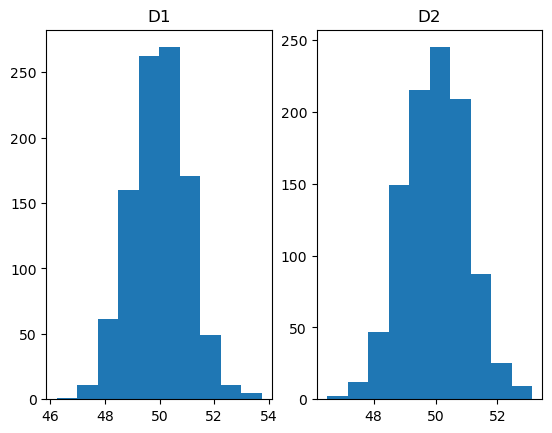

In [3]:
# Plot our two random variables
_, ax = plt.subplots(1, 2)
ax[0].hist(data[:, 0]); ax[0].set_title('D1');
ax[1].hist(data[:, 1]); ax[1].set_title('D2');

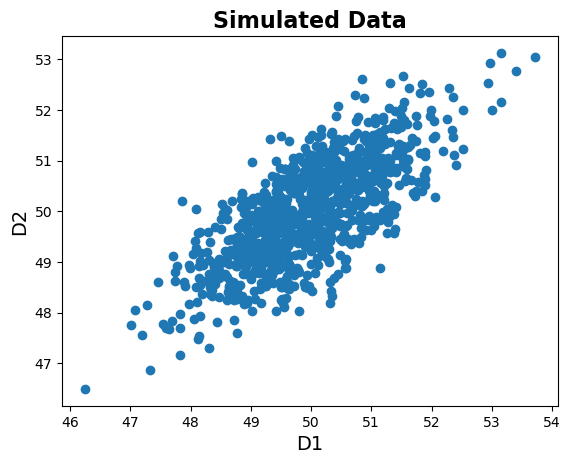

In [4]:
# Check out how the data relates to each other
plt.scatter(data[:, 0], data[:, 1]);

# Add title and labels
plt.title('Simulated Data', fontsize=16, fontweight='bold')
plt.xlabel('D1', fontsize=14);
plt.ylabel('D2', fontsize=14);

As we can see, there are features are indeed correlated. 


Note that one way to think about PCA is as a 'rotation' of the data to a new basis. If we want to choose a single dimension to represent this data, we can see that choosing one or the other of the original dimensions (the X or Y dimension in the plot) would not be ideal. What we want to do with PCA is chose a new set of dimension - like drawing new axes into our plot - to best represent our data.




In this case, we have 2-dimensions of data. What we want to do, with PCA, is chose a lower dimensional (in this case, 1D) representation of this data that preserves the most information from the data that we can, given the new dimensionality.

Note that in this example, we are only going from 2D -> 1D, for simplicity and convenience. In practice is most useful when there is a very large number of dimensions, say 20,000, and want to transform the data into a lower dimensional space, maybe something like 20 dimensions, that is more manageable and usable for further analyses.

# Applying PCA

Now, we want to apply PCA to our data, to reduce it's dimensionality, while capturing the most information we can from the original space.

To do so, we will use the PCA implementation from `sklearn`.

We will use the `PCA` object to initialize a `PCA` model specifying any settings we want, that we can then apply to the data. 

In [5]:
# Initialize the PCA model, here specifying 1 component
pca = PCA(n_components=1, whiten=True)

In [6]:
# Fit PCA to the data
pca = pca.fit(data)

The `pca` object has now learned the principal component representation of our data. 

We can now apply this to our original data with `transform`.

In [7]:
# Transform the data, using our learned PCA representation
out = pca.transform(data)

The returned variable is a new array, with our data, after dimensionality reduction. 

Recall that are original data was 2 dimnensional. Our transformed data is now 1 dimensional.

In [8]:
# Check out the dimensions of the data
print("Original data dimensions: \t", data.shape)
print("Transformed data dimensions: \t", out.shape)

Original data dimensions: 	 (1000, 2)
Transformed data dimensions: 	 (1000, 1)


By reducing the dimensionality, we off course lose at least some information.

Using PCA, we are nevertheless trying to preserve as much variance as we can. 

Next, let's check how much variance we have kept. 

We can do so, our the sklearn PCA object computes and stores how much explained variance each component captures. 

In [9]:
# Check how much variance is captured by the first component
print("The proportion of variance explained by the first " +
      "principcal component is {:1.4f}.".format(pca.explained_variance_ratio_[0]))

The proportion of variance explained by the first principcal component is 0.8685.


Finally, let's plot the transformed data.  

Note that in the plot below, the data is 1 dimensional, so the x-axis here is just index number. 

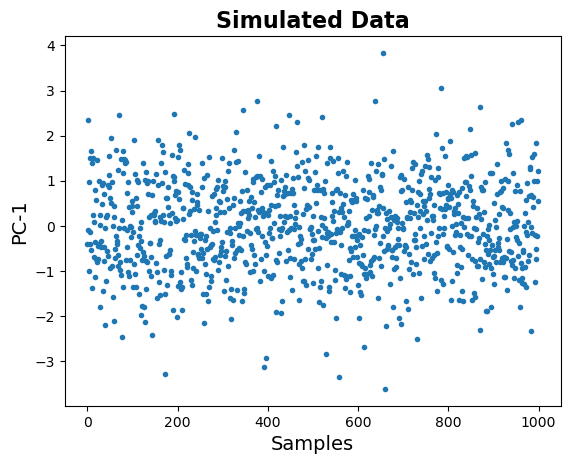

In [10]:
# Check out the transformed data, in the new space
plt.plot(out, '.');

# Add title and labels
plt.title('Simulated Data', fontsize=16, fontweight='bold')
plt.xlabel('Samples', fontsize=14);
plt.ylabel('PC-1', fontsize=14);

## Conclusion

Dimensionality reduction, and PCA in particular, are common data transformations, especially for large data. 

As for our other topics related to machine learning and data analysis, here we have merely introduced the basic ideas behind dimensionality reduction, and one of the most common algorithms to do so, PCA. For further information on these topics, look into more technical courses or resources. 

<div class="alert alert-info">
For a more in depth tutorial on doing PCA in Python, go
<a href="https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60" class="alert-link">here</a>,
and for a more technical orientation tutorial, go
<a href="http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html" class="alert-link">here</a>.
</div>